In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [11]:
dataset = pd.read_csv("Weather_Data.csv")
dataset

,Time,City,State,TemperatureC,TemperatureF,TemperatureK,Day_Date,Max_Temp,Min_Temp,Air_Quality,...,Rainday,AvgRainDay,AvgSnowDay,Umbrella,Outdoors,Driving,Clothing,Heat_Stroke,Wind_Chill,Date_Taken
0,03:13 PM,Bengaluru South,Karnataka,33,91.4,306,Sat 9,35,23,80,...,2,0.04,0.00,Umbrella No need,Outdoors Good,Driving safety Great,Clothing Shorts,Heat stroke Caution,Wind chill Safe,08-03-2024 15:04
1,03:14 PM,Mumbai,Maharashtra,30,86.0,303,Sat 9,31,23,118,...,0,0.01,0.00,Umbrella No need,Outdoors Good,Driving safety Very poor,Clothing Shorts,Heat stroke Caution,Wind chill Safe,08-03-2024 15:05
2,03:14 PM,Mandya,Karnataka,35,95.0,308,Sat 9,37,23,80,...,0,0.04,0.00,Umbrella No need,Outdoors Good,Driving safety Great,Clothing Shorts,Heat stroke Extreme caution,Wind chill Safe,08-03-2024 15:05
3,03:15 PM,Thane,Maharashtra,36,96.8,309,Sat 9,37,21,95,...,0,0.01,0.00,Umbrella No need,Outdoors Good,Driving safety Very poor,Clothing Shorts,Heat stroke Extreme caution,Wind chill Safe,08-03-2024 15:06
4,03:15 PM,Chennai,Tamil Nadu,34,93.2,307,Sat 9,34,25,132,...,2,0.05,0.00,Umbrella No need,Outdoors Good,Driving safety Great,Clothing Shorts,Heat stroke Danger,Wind chill Safe,08-03-2024 15:07
5,03:16 PM,Delhi,India,26,78.8,299,Sat 9,27,12,233,...,7,0.09,0.00,Umbrella No need,Outdoors Very poor,Driving safety Very poor,Clothing Breathable clothing,Heat stroke Safe,Wind chill Safe,08-03-2024 15:07
6,03:16 PM,Meghalaya Tourism Development Corporation,Shillong,20,68.0,293,Sat 9,21,9,89,...,26,0.25,0.00,Umbrella No need,Outdoors Great,Driving safety Very poor,Clothing Light jacket,Heat stroke Safe,Wind chill Safe,08-03-2024 15:08
7,03:17 PM,Srinagar,Jammu & Kashmir,14,57.2,287,Sat 9,16,2,169,...,32,0.55,0.22,Umbrella No need,Outdoors Very poor,Driving safety Great,Clothing Light jacket,Heat stroke Safe,Wind chill Safe,08-03-2024 15:08
8,03:04 PM,Bengaluru South,Karnataka,33,91.4,306,Sat 9,35,23,80,...,2,0.04,0.00,Umbrella No need,Outdoors Good,Driving safety Great,Clothing Shorts,Heat stroke Caution,Wind chill Safe,08-03-2024 15:14
9,03:04 PM,Mumbai,Maharashtra,30,86.0,303,Sat 9,31,23,118,...,0,0.01,0.00,Umbrella No need,Outdoors Good,Driving safety Very poor,Clothing Shorts,Heat stroke Caution,Wind chill Safe,08-03-2024 15:14


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          32 non-null     object 
 1   City          32 non-null     object 
 2   State         32 non-null     object 
 3   TemperatureC  32 non-null     int64  
 4   TemperatureF  32 non-null     float64
 5   TemperatureK  32 non-null     int64  
 6   Day_Date      32 non-null     object 
 7   Max_Temp      32 non-null     int64  
 8   Min_Temp      32 non-null     int64  
 9   Air_Quality   32 non-null     int64  
 10  Wind          32 non-null     int64  
 11  Humidity      32 non-null     float64
 12  Visibility    32 non-null     int64  
 13  Pressure      32 non-null     int64  
 14  Dew_point     32 non-null     int64  
 15  UV_index      32 non-null     int64  
 16  Status        32 non-null     object 
 17  Moon_Phase    32 non-null     object 
 18  Sunrise       32 non-null     ob

### Data Cleaning

In [13]:
dataset.isnull().sum()

Time            0
City            0
State           0
TemperatureC    0
TemperatureF    0
TemperatureK    0
Day_Date        0
Max_Temp        0
Min_Temp        0
Air_Quality     0
Wind            0
Humidity        0
Visibility      0
Pressure        0
Dew_point       0
UV_index        0
Status          0
Moon_Phase      0
Sunrise         0
Sunset          0
Moonrise        0
Moonset         0
Sunny           0
Rainsnow        0
Rainday         0
AvgRainDay      0
AvgSnowDay      0
Umbrella        0
Outdoors        0
Driving         0
Clothing        0
Heat_Stroke     0
Wind_Chill      0
Date_Taken      0
dtype: int64

In [14]:
dataset["City"] = dataset["City"].replace({"Meghalaya Tourism Development Corporation":"Meghalaya"})

####  Average temperature across cities recorded

In [15]:
avg_temp = dataset.groupby("City")["TemperatureC"].mean()
avg_tempDF = pd.DataFrame(avg_temp)
avg_tempDF

,TemperatureC
City,
Bengaluru South,33.0
Chennai,34.0
Delhi,26.0
Mandya,35.0
Meghalaya,20.0
Mumbai,30.0
Srinagar,14.0
Thane,36.0


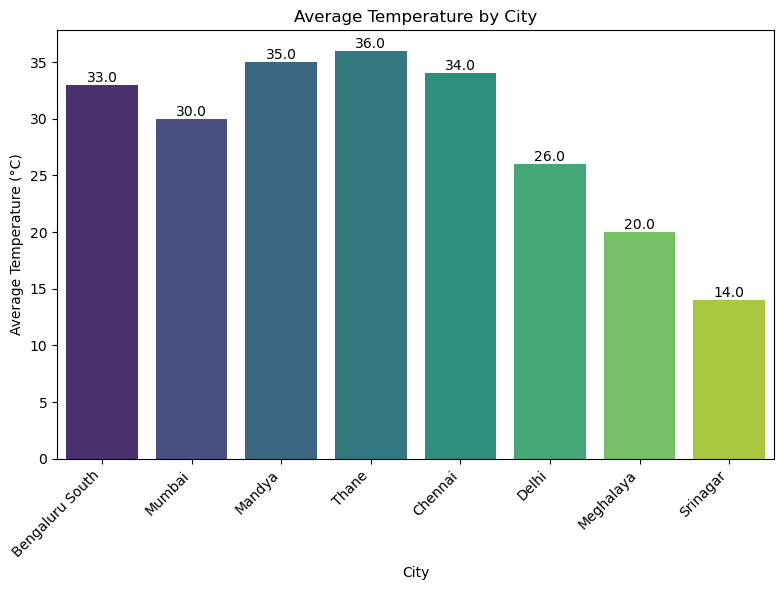

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='TemperatureC', data=dataset, palette='viridis')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}'.format(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
plt.title('Average Temperature by City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

####  Which city recorded the maximum and minimum temperature

In [17]:
max_temp = dataset["Max_Temp"].max()
city = dataset.loc[dataset["Max_Temp"] == max_temp,"City"].iloc[0]
print(city,":",max_temp)

min_temp = dataset["Min_Temp"].min()
city1 = dataset.loc[dataset["Min_Temp"] == min_temp,"City"].iloc[0]
print(city1,":",min_temp)


Mandya : 37
Srinagar : 2


#### Year on Year change in air quality

In [18]:
#dataset.groupby("Year_Taken")["Air_Quality"].mean()

In [20]:
"""
mean_air_quality_by_year = dataset.groupby("Year_Taken")["Air_Quality"].mean()
mean_air_quality_by_year_df = pd.DataFrame(mean_air_quality_by_year).reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(mean_air_quality_by_year_df["Year_Taken"], mean_air_quality_by_year_df["Air_Quality"], marker='o', linestyle='-')
plt.title('Mean Air Quality by Year')
plt.xlabel('Year')
plt.ylabel('Mean Air Quality')

plt.grid(True)
plt.tight_layout()
plt.show()
"""

'\nmean_air_quality_by_year = dataset.groupby("Year_Taken")["Air_Quality"].mean()\nmean_air_quality_by_year_df = pd.DataFrame(mean_air_quality_by_year).reset_index()\n\n# Plot\nplt.figure(figsize=(8, 6))\nplt.plot(mean_air_quality_by_year_df["Year_Taken"], mean_air_quality_by_year_df["Air_Quality"], marker=\'o\', linestyle=\'-\')\nplt.title(\'Mean Air Quality by Year\')\nplt.xlabel(\'Year\')\nplt.ylabel(\'Mean Air Quality\')\n\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n'

#### Which city recorded the highest air quality index and which city recorded the lowest 

In [21]:
min_airquality = dataset["Air_Quality"].min()
city1 = dataset.loc[dataset["Air_Quality"] == min_airquality,"City"].iloc[0]
date_taken1 = dataset.loc[dataset["Air_Quality"] == min_airquality,"Date_Taken"].iloc[0]

print(city1,":",min_airquality,":",date_taken1)

max_airquality = dataset["Air_Quality"].max()
city = dataset.loc[dataset["Air_Quality"] == max_airquality,"City"].iloc[0]
date_taken = dataset.loc[dataset["Air_Quality"] == max_airquality,"Date_Taken"].iloc[0]

print(city,":",max_airquality,":",date_taken)

Bengaluru South : 80 : 08-03-2024 15:04
Delhi : 233 : 08-03-2024 15:07


#### Average Windspeed across all states till date

In [22]:
avg_wind = dataset.groupby("State")["Wind"].mean()
avg_windDF = pd.DataFrame(avg_wind)
avg_windDF

,Wind
State,
India,10.000000
Jammu & Kashmir,3.000000
Karnataka,4.833333
Maharashtra,17.000000
Shillong,4.333333
Tamil Nadu,10.000000
India,10.000000
Jammu & Kashmir,3.000000
Karnataka,5.000000


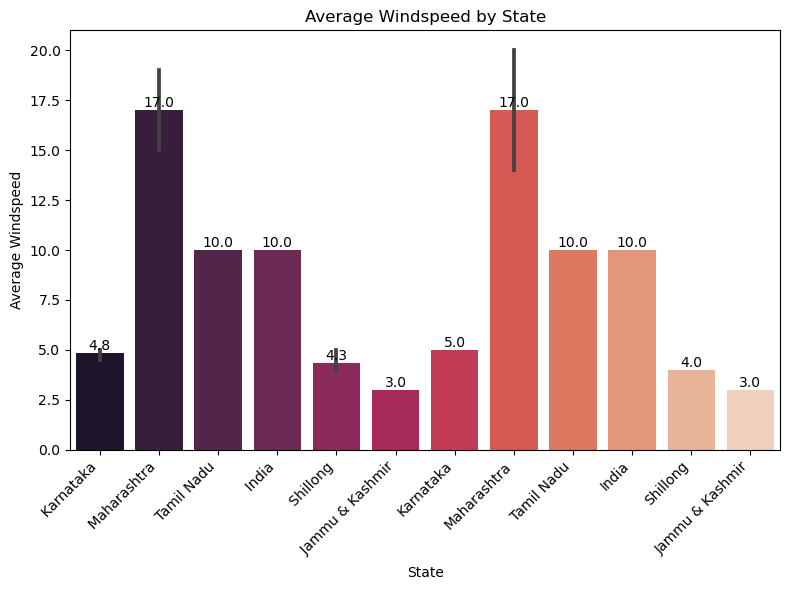

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='Wind', data=dataset, palette='rocket')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}'.format(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
plt.title('Average Windspeed by State')
plt.xlabel('State')
plt.ylabel('Average Windspeed')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

#### City which recorded the highest and lowest visibility

In [24]:
max_visibility = dataset["Visibility"].max()
city = dataset.loc[dataset["Visibility"] == max_visibility,"City"].iloc[0]

print(city,":",max_visibility)

min_visibility = dataset["Visibility"].min()
city1 = dataset.loc[dataset["Visibility"] == min_visibility,"City"].iloc[0]

print(city1,":",min_visibility)

Mandya : 10
Mumbai : 3


#### Average Pressure recorded over the year

In [26]:
#avg_pressure = dataset.groupby("Year_Taken")["Pressure"].mean()
#avg_pressureDF = pd.DataFrame(avg_pressure)
#avg_pressureDF

In [27]:
"""
mean_pressure_by_year = dataset.groupby("Year_Taken")["Pressure"].mean()
mean_pressure_by_year_df = pd.DataFrame(mean_pressure_by_year).reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(mean_pressure_by_year_df["Year_Taken"], mean_pressure_by_year_df["Pressure"], marker='o', linestyle='-')
plt.title('Mean Pressure by Year')
plt.xlabel('Year')
plt.ylabel('Mean Pressure Quality')

plt.grid(True)
plt.tight_layout()
plt.show()
"""

'\nmean_pressure_by_year = dataset.groupby("Year_Taken")["Pressure"].mean()\nmean_pressure_by_year_df = pd.DataFrame(mean_pressure_by_year).reset_index()\n\n# Plot\nplt.figure(figsize=(8, 6))\nplt.plot(mean_pressure_by_year_df["Year_Taken"], mean_pressure_by_year_df["Pressure"], marker=\'o\', linestyle=\'-\')\nplt.title(\'Mean Pressure by Year\')\nplt.xlabel(\'Year\')\nplt.ylabel(\'Mean Pressure Quality\')\n\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n'

#### Average Dewpoint Recorded City wise

In [28]:
avg_dewpoint = dataset.groupby("City")["Dew_point"].mean()
avg_dewpointDF = pd.DataFrame(avg_dewpoint)
avg_dewpointDF

,Dew_point
City,
Bengaluru South,10.0
Chennai,24.0
Delhi,7.0
Mandya,10.5
Meghalaya,1.5
Mumbai,9.0
Srinagar,7.0
Thane,6.0


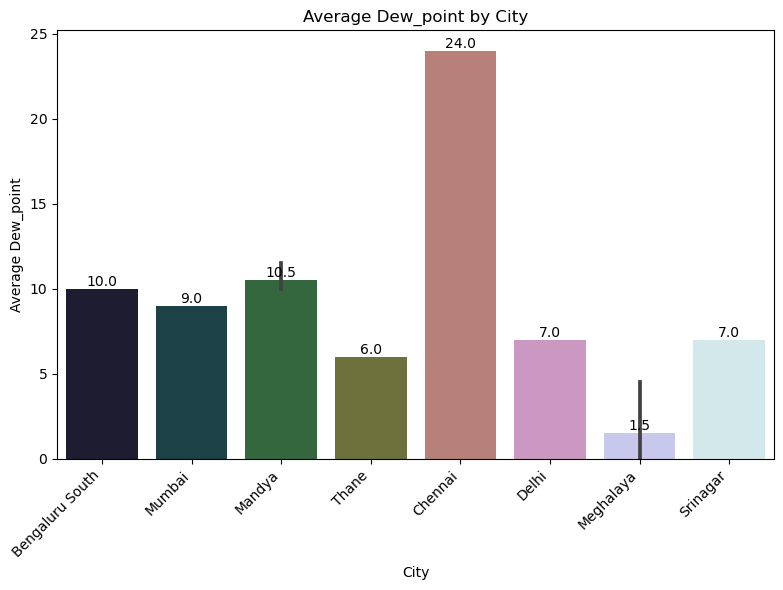

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Dew_point', data=dataset, palette='cubehelix')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}'.format(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
plt.title('Average Dew_point by City')
plt.xlabel('City')
plt.ylabel('Average Dew_point')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

#### City Which recorded the highest UV index and the least UV index

In [30]:
max_uv = dataset["UV_index"].max()
city = dataset.loc[dataset["UV_index"] == max_uv,"City"].iloc[0]

print(city,":",max_uv)

min_uv = dataset["UV_index"].min()
city1 = dataset.loc[dataset["UV_index"] == min_uv,"City"].iloc[0]

print(city1,":",min_uv)

Mumbai : 10
Delhi : 6


#### Outdoor Conditions favourable based on the words mentioned

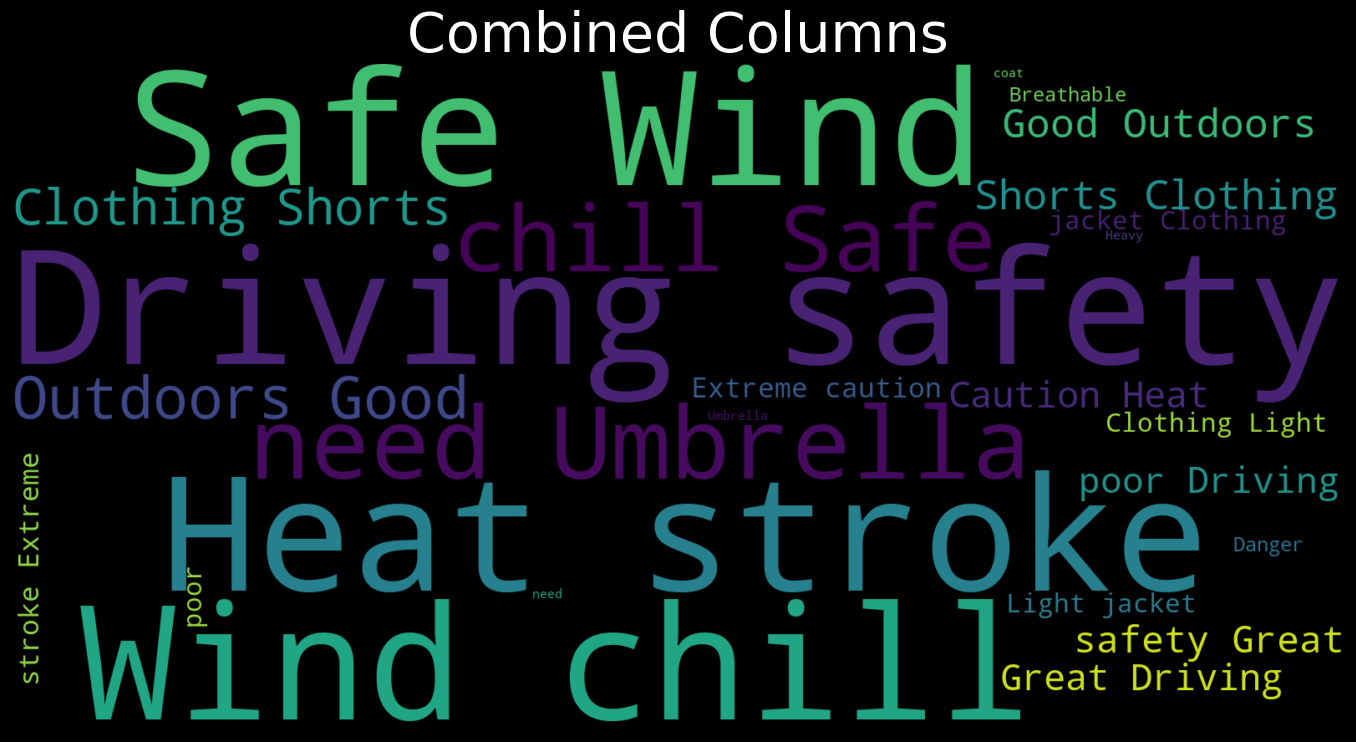

In [31]:
combined_text = ' '.join(dataset['Umbrella']) + ' ' + ' '.join(dataset['Outdoors']) + ' ' + ' '.join(dataset['Driving']) + ' ' + ' '.join(dataset['Clothing']) + ' ' + ' '.join(dataset['Heat_Stroke']) + ' ' + ' '.join(dataset['Wind_Chill'])

wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)

# Generate word cloud using the combined text
wc.generate(combined_text)

# Declare figure and customize it
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Combined Columns", fontsize=40, color='white')

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)

# Show the plot
plt.show()